In [1]:
# Importing librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Link to the dataset - I have downloaded the dataset from Kaggle and uploaded it to my github repository
url = "https://raw.githubusercontent.com/kueyram/dsc550/main/Week%207/train.csv"

# Reading the dataset into pandas
housing_data = pd.read_csv(url)

# Let's view the columns
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# Let's view the first 5 rows
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Dropping the ID column
housing_data.drop(columns=['Id'], inplace=True)

In [5]:
# Finding columns with more than 40% missing values
# Calculating the percentage of missing values for each columns
missing_values = housing_data.isnull().mean()

# Filtering the columns with more than 40% missing values
columns_to_drop = missing_values[missing_values > 0.4].index

# Printing columns to drop
print(columns_to_drop)

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [6]:
# Dropping columns with more than 40% missing values
housing_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [7]:
# Let's identify the numeral columns in the dataset
numerical_columns = housing_data.select_dtypes(include=[np.number]).columns

# Printing the list of numerical columns
print(numerical_columns)
print(len(numerical_columns))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
37


In [8]:
# Let's loop through the numerical columns and replace missing data with the median value
for column in numerical_columns:
    housing_data[column].fillna(housing_data[column].median(), inplace=True)

In [9]:
# Let's find the categorical columns
categorical_columns = housing_data.select_dtypes(include=['object']).columns

# Printing the list of categorical columns
print(categorical_columns)
print(len(categorical_columns))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
37


In [10]:
# Filling missing values in categorical columns with the most common value (mode)
# looping through the categorical columns
for column in categorical_columns:
    # Getting the mode value for the column
    mode_value = housing_data[column].mode()[0]
    # Filling missing values with mode
    housing_data[column].fillna(mode_value, inplace=True)

In [11]:
# Let's view the first 5 rows
housing_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# Converting categorical columns to dummy variables
housing_data_converted = pd.get_dummies(housing_data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
housing_data_converted.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [13]:
# Splitting the data into features and target
features = housing_data_converted.drop('SalePrice', axis=1)
target = housing_data_converted['SalePrice']

# Splitting the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [14]:
# Creating a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(features_train, target_train)

# Predictions on the test set
predictions = model.predict(features_test)

# R-squared
r2 = r2_score(target_test, predictions)

# RMSE
rmse = np.sqrt(mean_squared_error(target_test, predictions))

# Printing the result
print('The R2-value is ', r2)
print('The RMSE is ',rmse)

The R2-value is  0.5692602839305727
The RMSE is  54540.112327652576


In [15]:
# Create PCA that will retain 90% of variance
pca = PCA(n_components=0.90, whiten = True)

# Conducting PCA
features_train_pca = pca.fit_transform(features_train)

# Printing the results
print('Original number of features: ', features_train.shape[1])
print('Reduced number of features: ', features_train_pca.shape[1])

Original number of features:  229
Reduced number of features:  1


In [16]:
# Number of features in the PCA-transformed matrix
print("Number of features in PCA-transformed matrix:", features_train_pca.shape[1])

Number of features in PCA-transformed matrix: 1


In [17]:
# Transforming  the test features with the same PCA.
features_test_pca = pca.transform(features_test)

# Printing the shape of the test features
features_test_pca.shape

(292, 1)

In [18]:
# Creating a linear regression model
model_pca = LinearRegression()

# Train the model on the training data
model_pca.fit(features_train_pca, target_train)

# Predictions on the test set
predictions_pca = model_pca.predict(features_test_pca)

# R-squared
r2_pca = r2_score(target_test, predictions_pca)

# RMSE
rmse_pca = np.sqrt(mean_squared_error(target_test, predictions_pca))

# Printing the result
print('The R2-value is ', r2_pca)
print('The RMSE is ',rmse_pca)

The R2-value is  0.08619784709862965
The RMSE is  79439.16266376621


In [19]:
# Creating a scaler object
scaler = MinMaxScaler()

# Fitting the scaler on the training features
scaler.fit(features_train)

# Transforming the training features using the fitted scaler
features_train_scaled = scaler.transform(features_train)

# Shape of the Min-Max scaled training features
print("Shape of Min-Max scaled training features:", features_train_scaled.shape)

Shape of Min-Max scaled training features: (1168, 229)


In [20]:
# Calculating the variance of each scaled feature
feature_variances_minmax = np.var(features_train_scaled, axis=0)

# Indices of features with variance above 0.1
selected_indices = np.where(feature_variances_minmax > 0.1)[0]

# Names of selected features
selected_features = features_train.columns[selected_indices]

# Printing the features with variance higer than 0.1
print("Min-Max scaled features with variance above 0.1:")
for feature, variance in zip(selected_features, feature_variances_minmax[selected_indices]):
    print(f"Feature: {feature}, Variance: {variance:.4f}")

Min-Max scaled features with variance above 0.1:
Feature: YearRemodAdd, Variance: 0.1187
Feature: YrSold, Variance: 0.1115
Feature: MSZoning_RL, Variance: 0.1668
Feature: MSZoning_RM, Variance: 0.1268
Feature: LotShape_Reg, Variance: 0.2333
Feature: LotConfig_Inside, Variance: 0.1981
Feature: Neighborhood_NAmes, Variance: 0.1286
Feature: Condition1_Norm, Variance: 0.1126
Feature: HouseStyle_1Story, Variance: 0.2500
Feature: HouseStyle_2Story, Variance: 0.2139
Feature: RoofStyle_Gable, Variance: 0.1745
Feature: RoofStyle_Hip, Variance: 0.1612
Feature: Exterior1st_HdBoard, Variance: 0.1250
Feature: Exterior1st_MetalSd, Variance: 0.1207
Feature: Exterior1st_VinylSd, Variance: 0.2283
Feature: Exterior1st_Wd Sdng, Variance: 0.1274
Feature: Exterior2nd_HdBoard, Variance: 0.1182
Feature: Exterior2nd_MetalSd, Variance: 0.1182
Feature: Exterior2nd_VinylSd, Variance: 0.2255
Feature: Exterior2nd_Wd Sdng, Variance: 0.1238
Feature: ExterQual_Gd, Variance: 0.2218
Feature: ExterQual_TA, Variance: 0.2

In [21]:
# Creating a scaler object
scaler = MinMaxScaler()

# Fitting the scaler on the training features
scaler.fit(features_train)

# Transforming the test features using the fitted scaler
features_test_scaled = scaler.transform(features_test)

# Test features
features_test_scaled = scaler.transform(features_test)

# Printing the shape of the test features
features_test_scaled.shape

(292, 229)

In [22]:
# Variance higher than 0.1 features
features_train_scaled = features_train[selected_features]

# Split the data into training and test sets
features_train_scaled, features_test_scaled, target_train_scaled, target_test_scaled = train_test_split(
    features_train_scaled, target_train, test_size=0.2, random_state=0)

# Check the shapes of the training and test sets
print("Training set shape with high variance features:", features_train_scaled.shape,target_train_scaled.shape)
print("Test set shape with high variance features:",features_test_scaled.shape, target_test_scaled.shape)

Training set shape with high variance features: (934, 41) (934,)
Test set shape with high variance features: (234, 41) (234,)


In [23]:
# Creating a linear regression model
model_scaled = LinearRegression()

# Train the model on the training data
model_scaled.fit(features_train_scaled, target_train_scaled)

# Predictions on the test set
predictions_scaled = model_scaled.predict(features_test_scaled)

# R-squared
r2_scaled = r2_score(target_test_scaled, predictions_scaled)

# RMSE
rmse_scaled = np.sqrt(mean_squared_error(target_test_scaled, predictions_scaled))

# Printing the result
print('The R2-value is ', r2_scaled)
print('The RMSE is ',rmse_scaled)

The R2-value is  0.6567488419603955
The RMSE is  43406.892645812826


In [24]:
url2 = 'https://raw.githubusercontent.com/kueyram/dsc550/main/Week%207/mushrooms.csv'
mushrooms_df = pd.read_csv(url2)

# Columns
mushrooms_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [25]:
# First 5 rows
mushrooms_df.shape

(8124, 23)

In [26]:
mushrooms_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [27]:
# Convert categorical features to dummy variables
mushrooms_df_dummies = pd.get_dummies(mushrooms_df)

# Display the first few rows
mushrooms_df_dummies.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [28]:
# Splitting the data into features and target
features = mushrooms_df_dummies.drop('class_e', axis=1)
target = mushrooms_df_dummies['class_e']

# Splitting the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [29]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decisiontree = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the training data
decisiontree_model = decisiontree.fit(features_train, target_train)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
decisiontree_predictions = decisiontree_model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(target_test, decisiontree_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion_matrix = confusion_matrix(target_test, decisiontree_predictions)

# Printing the confusion matrix
print('Confusion matrix \n', confusion_matrix)

Accuracy: 1.0
Confusion matrix 
 [[773   0]
 [  0 852]]


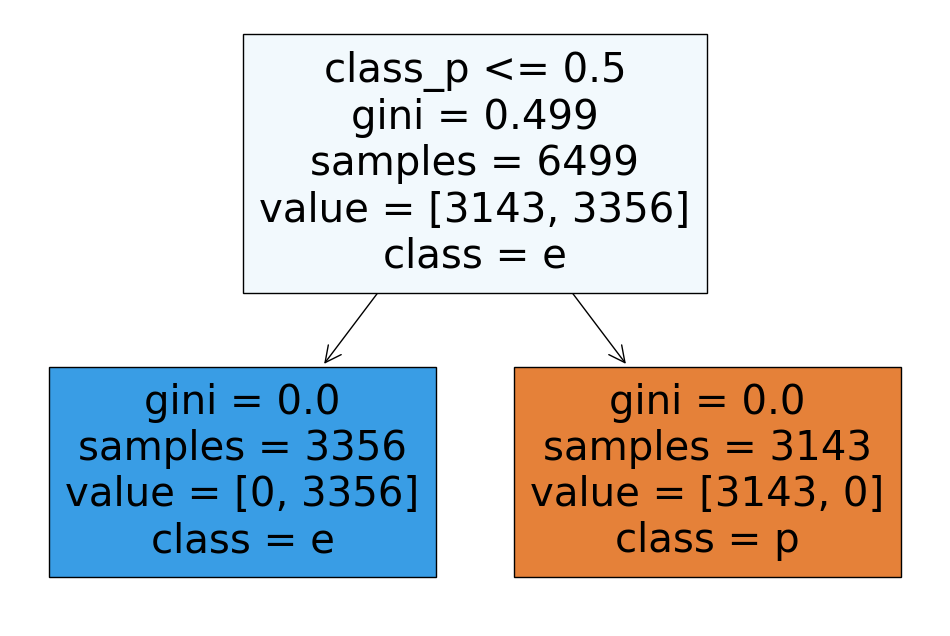

In [31]:
# Let's use pyplot and then use graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size
plt.figure(figsize=(12, 8))

target_names = mushrooms_df['class'].unique()
# Plot the decision tree
plot_tree(decisiontree_model, filled=True, feature_names=features.columns, class_names=target_names)
plt.show()

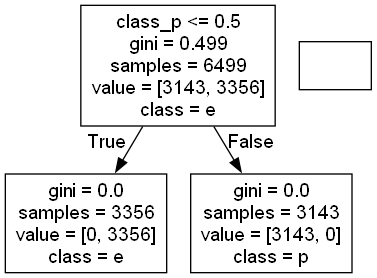

In [32]:
import pydotplus
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
# Export the tree to a DOT file
dot_data = export_graphviz(decisiontree_model, 
                            out_file=None, 
                           feature_names=features_train.columns,  
                           class_names =  target_names)

# Drawing the graph
graph = pydotplus.graph_from_dot_data(dot_data)

#Showing the graph
Image(graph.create_png())

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting 5 best features for the data
chi2_selector = SelectKBest(chi2, k=5)
features_train_kbest = chi2_selector.fit_transform(features_train, target_train)

# Showing the results
print('Original number of features: ', features.shape[1])
print('Reduces number of features: ', features_train_kbest.shape[1])

Original number of features:  118
Reduces number of features:  5


In [34]:
# Let's get the indices of the selected features
selected_features_indices = chi2_selector.get_support(indices=True)

# Names of the features
selected_feature_names = features_train.columns[selected_features_indices]

# Printing the result
print('Selected features: \n')
for feature in selected_feature_names:
    print (feature)


Selected features: 

class_p
odor_f
odor_n
stalk-surface-above-ring_k
stalk-surface-below-ring_k


In [35]:
# Let's transform test features using selected features
features_test_kbest = chi2_selector.transform(features_test)

# Decision tree classifier using the selected features
decisiontree_selected_features = DecisionTreeClassifier(random_state=0)

# Fitting the classifier to the training data using the selected features
decisiontree_selected_features.fit(features_train_kbest, target_train)

# Predictions on the test set using the selected features
decisiontree_selected_features_predictions = decisiontree_selected_features.predict(features_test_kbest)

# Accuracy using the selected features
accuracy_selected_features = accuracy_score(target_test, decisiontree_selected_features_predictions)
print("Accuracy with selected features:", accuracy_selected_features)

Accuracy with selected features: 1.0


In [36]:
from sklearn.metrics import confusion_matrix

# Confusion matrix using the selected features
confusion_matrix_selected_features = confusion_matrix(target_test, decisiontree_selected_features_predictions)

print("Confusion matrix with selected features:\n", confusion_matrix_selected_features)

Confusion matrix with selected features:
 [[773   0]
 [  0 852]]
